# Visualizing Correlation



## In this section

In this section we will discuss:

- Making scatterplots from a .csv file using the matplotlib library
- Revising these figures through several steps to make them polished and publication-ready
- Adjusting matplotlib's default scatterplots to make them clearer and more informative
- Plotting the the regression line for  a linear regression using the statsmodels library onto our regression
- Extracting R<sup>2</sup> and p values from a statsmodel linear regression and plotting them
- Plotting 95% confidence intervals and 95% prediction intervals on the plot
- The meaning of confidence intervals vs. prediction intervals
- Adding label legends

## Prerequisites

- Familiar with running python in Jupyter notebooks
- Have Anaconda python installed
- Familiar with basic python data types (list)
- Basic familiarity with pandas DataFrames
- Basic familiarity with matplotlib
- Basic familiarity with the concept of linear regression

## Table of Content

[TODO]

## Overview

Correlation is one of the most common patterns that needs to be represented in bioinformatics. While there are some types of data, like paired data –  pretreatment and posttreatment measurements from each of 10 mice, for instance — that may have special considerations, many types of correlation can be conveyed in a simple scatterplot. Often such plots combine both the raw data itself, as well as some sort of statistical regression model fit to the data. Some may additionally layer in pictographs (images of different species in an analysis, for example), label key data points, or 
indicate summary statistics right on the graph.

In this section, we will focus on implementing a publication-ready scatterplot in matplotlib that incorporates several of these features. 

While basic graphs can be produced very quickly, more complex publication- or presentation- ready graphs generally require some degree of manual adjustment in order to achieve best results.


In this chapter we will start with a simple scatterplot, then layer in statistical, stylistic and formatting elements until we have a nice figure that we could happily use to show that two variables are correlated in a publication. 

Here's an overview of how our plots will look as we start with a simple scatterplot, and revise it over time:

<img width="800" src="./resources/revising_a_figure.png" alt="Nine versions of the same scatterplot figure with increasing complexity, starting with a simple scatterplot, then adding a regression line, then marking statistical values on the chart, then shading in 95% confidence intervals, the adjusting the axis legends to be a larger font size">

Hold on to your hats - it's going to be a journey! 

Also, before you get started, please do note that if the code in the last few steps is intimidating right now that's OK - you can revise as much as you are able and just refer back to those sections when or if you ever need to modify a plot in those ways. 

## A simple scatterplot in matplotlib

In order to generate a scatterplot in matplotlib, the bare minimum we need are two lists of data - one for the x values and one for the y-values. One common way of getting these is to load a `.csv` or comma-separated values file (which itself can be output from Microsoft Excel or Google Sheets) as a pandas `DataFrame` object. We can then select the x-column, convert it to a list, and save it to an `x_values` variable. If we repeat that for the variable we want to plot on the y-axis, we then have all the information we need for a basic scatter plot

<class 'matplotlib.figure.Figure'>


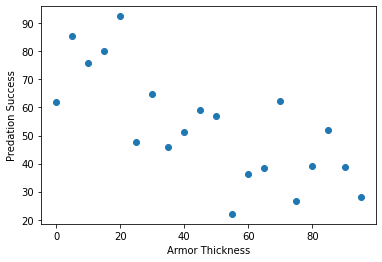

In [1]:
#Import pandas, which will let us use a DataFrame to handle our tabular data.
import pandas as pd

#Import matplotlib, which will let us plot the data
import matplotlib.pyplot as plt

#Load the data
df = pd.read_csv('./resources/armor_thickness_vs_predation.csv')

#Extract x and y data
x_data = list(df['armor_thickness'])
y_data = list(df['predation_success'])

#Set up a Figure and Axes object
fig,ax = plt.subplots()
print(type(fig))

#The Figure (fig) is a container for the overall chart
#The AxesSubplot object (ax) holds the x- and y- axis markings and methods for plotting data
#Most plotting will be done using methods of the axes (ax) object.

#Make the scatterplot
#Here, we use the scatter() method of the AxesSubplot object
ax.scatter(x_data,y_data)

#(You can run the code at this point to see the graph)

#Optional - Label the axes
ax.set_xlabel('Armor Thickness')
ax.set_ylabel('Predation Success')

#Optional - Save our graph to a file
#In this case it is 

fig.savefig("armor_thickness_vs_predation_success_version0.png",dpi=300)

That's it! 

This chart isn't especially pretty, but is good enough that we can at least see what's going on. 

You may notice that there are no units on the axes. Before we showed the plot to someone else, it would be a good idea to include these so the scale of the graph is clear. The correct units in this case are millimeters (mm) for shell thickness and percentage (`%`) for predation success. You make this fix by adjusting the strings passed to the xlabel and ylabel functions in the above code.

**Try it yourself**: adjust the x and y labels so that the units are show. Let's show `%` (short for percentage) for the y-axis and `mm` (millimeters) for the x-axis. 

Now that the graph meets a basic standard of clarity, let's take a moment and consider what it might mean.

**Stop and consider**. Based on what we've shown so far, do you think armor thickness affects predation success? How confident are you? For example, based on this graph, are you  totally sure armor matters, unsure, totally sure it doesn't?.

For me, just looking at this plot I'm not really sure how much I should believe these factors to be related to one another - I can sort of squint and see a downward trend, but it is hard for me to estimate visually if I would see similar trends in random data. So I would be firmly in the unsure camp. This is a situation in which statistical analysis can be very useful - it can help us to quantify roughly how unsure we should be.

Let's try using linear regression to fit a line through these data, and draw the result onto our chart. For completeness, let's repeat all the code from before, and just add in the new analysis.

## A scatterplot with inferred linear regression line in matplotlib

We can use the `ols` function in statsmodels.py to perform Ordinary Least Squares regression on our data. This will find the model parameters (meaning the slope(s) and intercept) that minimize the sum of squared errors from our model in the data. Basically, this just picks a slope and intercept that cause the regression line that matches the bulk of our data points as much as possible.

To add a regression line to our plot, we have to do two main things, in addition to what we did before:

1) **Fit the regression model** using statsmodels

2) **Extract the model predictions** into a list that we can plot

3) **Plot a line** on top of the scatterplot that reflects the model predictions

Let's add this information to our plot. Read the following code comments and see if you can see where we are getting the fitted values out of our regression model, and where we are plotting them using a black line:

                            OLS Regression Results                            
Dep. Variable:      predation_success   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     20.37
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           0.000269
Time:                        16:35:29   Log-Likelihood:                -80.039
No. Observations:                  20   AIC:                             164.1
Df Residuals:                      18   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          76.4840      6.013     

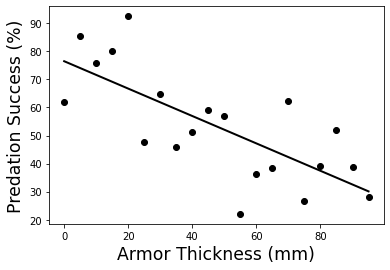

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

#Load the data
df = pd.read_csv('./resources/armor_thickness_vs_predation.csv')

#Extract x and y data
x_data = list(df['armor_thickness'])
y_data = list(df['predation_success'])

## Add a regression line
import statsmodels.formula.api as smf
formula = "predation_success ~ armor_thickness"
model = smf.ols(formula,data=df)
model_fit = model.fit()

#Set up a Figure and Axes object
fig,ax = plt.subplots()

#Plot the raw data
ax.scatter(x_data,y_data,marker='o',color='black')

#Plot the model predictions

#To be a little fancy, let's put our formula
#into the legend label, so readers can tell
#exactly what regression we did
legend_label = f"Regression line({formula})"

#Set the y-axis values based on the model predictions
y_predicted = model_fit.fittedvalues

#Now we actually plot the line
ax.plot(x_data,y_predicted,label=legend_label,color="black",linewidth=2)

#Set x- and y- axis labels
ax.set_xlabel("Armor Thickness (mm)",size="xx-large")
ax.set_ylabel("Predation Success (%)",size="xx-large")

#Print summary results
print(model_fit.summary())

#Save the figure 
# dpi controls the resolution in dots per inch (important since journals have minimal dpi requirements)
fig.savefig("armor_thickness_vs_predation_success_version1.png",dpi=300)

**Stop and consider**: using the regression results up above, how does your impression of the relationship between armor thickness and predation success change? Or does it stay about the same?

*Hint*: you can look at the coef. values next to each variable to see what value OLS found for the intercept and the slope. The p-values next to each variable indicate significance, with p < 0.05 typically taken as a threshold for significance. 

## Polishing our chart

The next block of code adds some niceties to our chart. You can steal elements from it to use in your own charts.
These code examples build on the previous code to generate the plot, so be sure to run that before adding these graphical upgrades.

While it is quite quick to produce a simple chart, it takes a bit more code to make the chart look really nice. For quick analyses, polishing charts may not be necessary. However, for key results it can be very useful to make charts that look more polished. 

We'll polish our chart in several ways:

- Marking key statistical values on the chart directly
- Show the confidence intervals for our OLS regression on the plot
- Make tick labels larger and more readable
- Add a legend
- Removing unnecessary elements of the frame to declutter the chart
- Adjust the axes so they only extend as far as the data

Because it each of these changes is small, and it would make the chapter very long to reprint the code after each change, the following code *adds* to the code for the plot with regression line above.

On disadvantage of coding the figure piece-by-piece like this in jupyter notebooks is that we will have to use only axis and figure methods (e.g. `ax.scatter` or `fig.savefig` rather than `plt.scatter` or `plt.savefig`), and we will also have to call `ax.get_figure()` at the end of each cell to show the updated figure. 

However, a self-contained version with all the polishing changes is printed at the end of the chapter for reference. 


### Mark R2 and p values on the chart

One of the first questions a reader will ask in examining a chart that shows correlation is whether any *apparent* correlation they think they see could just be due to random chance — just like you can easily see faces or animals in random cloud formations. 

One way to test whether this is the case is to calculate a p-value that says how likely it is to get a slope as far from 0 as the one we actually see *if the data were totally uncorrelated*. In other words, we test the hypothesis that the slope is, in fact, perfectly flat, indicating no correlation between the x- and y- variables. We've already done this using simple linear regression with ordinary least squares via the `ols` function from `statsmodels`. 

Now we've got an opportunity to communicate the most imporant elements of those regression results those results clearly to sighted readers. Note that for readers who can't see (and might be reading our paper or report using a screen reader to speak the text) we'll want to make sure this information is also available in text form as part of the figure legend.


For example, we'll extract R2 and p values from our statistical results and plot them onto the chart.

Helpfully, the `stastmodels` model fit object (which we previously stored in `model_fit`) holds this information.
So if we save it in separate variables, we can then stick them into strings using string formatting, and use the `annotate` function in `matplotlib` to draw those strings where we want on the plot.

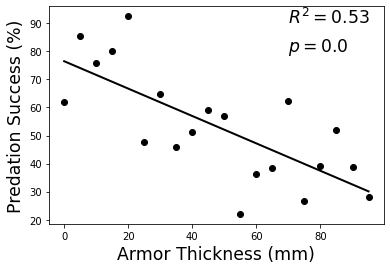

In [3]:
#Extract R2 from model and add to scatterplot
R2 = round(model_fit.rsquared,2)
ax.annotate(xy=(70,90),text=fr'$R^2 = {R2}$',size="xx-large")

p = round(model_fit.f_pvalue,2)
ax.annotate(xy=(70,80),text=fr'$p = {p}$',size="xx-large")

#Save the figure
fig.savefig("armor_thickness_vs_predation_success_version2.png",dpi=300)

#Show our growing figure in Jupyter notebook
ax.get_figure()

### Adding shaded confidence and prediction intervals to our graph

Usually, when we do a linear regression on different datasets, we get slightly different results *even if the underlying process is the same*.
Therefore, it can be useful to calculate a **95% confidence interval of the mean** for the regression that describes this uncertainty. This interval describes the range within which the mean y-value for any given x-value will fall 95% of the time, if the model assumptions are correct. 

Another related measure is the **95% prediction interval**. For each x value, this is the range on the y-axis within which a new data point will fall 95% of the time, if the model is correct. 

The 95% prediction interval will be larger than the 95% confidence interval, since the mean — by virtue of being an average — is more stable and predictable than individual data points predicted by the model.

It's important to note that to obtain a 95% confidence interval, we can only allow 2.5% of the data to be above our predicted range, and 2.5% below it (thus summing to 5% error in total). Therefore, perhaps counter-intuitively, to find these intervals we have to find values within the 2.5% - 97.5% percentiles.

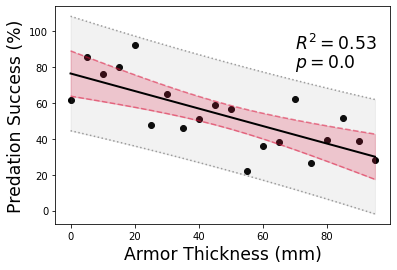

In [4]:
#This code is ADDED to the previous code

#Get a dataframe from our statsmodels linear regression model fit
prediction = model_fit.get_prediction()
model_prediction_df = prediction.summary_frame()

#Plot a shaded area for the 95% confidence interval of observations
#95% of y values for a given x value should fall within this range
#Shade in the outermost confidence interval first, as it will be on bottom
lower_obs_ci = model_prediction_df["obs_ci_lower"]
upper_obs_ci = model_prediction_df["obs_ci_upper"]
ax.fill_between(x_data,lower_obs_ci,upper_obs_ci,alpha=0.1,color='grey')
ax.plot(x_data,lower_obs_ci,alpha=0.75,marker=None,linestyle='dotted',color='grey',label="95% Confidence Interval of Observations")
ax.plot(x_data,upper_obs_ci,alpha=0.75,marker=None,linestyle='dotted', color='grey')

#Plot a shaded area for the 95% confidence interval of the regression
#the true regression line (if the model is correct) should fall within this area 95% of the time
lower_ci = model_prediction_df["mean_ci_lower"]
upper_ci = model_prediction_df["mean_ci_upper"]
ax.fill_between(x_data,lower_ci,upper_ci,alpha=0.2,color='crimson')
ax.plot(x_data,lower_ci,alpha=0.5,marker=None,linestyle='dashed',color='crimson',label="95% Confidence Interval of Mean")
ax.plot(x_data,upper_ci,alpha=0.5,marker=None,linestyle='dashed',color='crimson')

#Save the figure
fig.savefig("armor_thickness_vs_predation_success_version3.png",dpi=300)

#Show our figure in Jupyter Notebook
#(Only necessary if you split your graphing code between multiple cells)
ax.get_figure()


### Make the x and y tick labels bigger

Figures in academic publications are typically shrunk to be quite small. So it is often necessary to increase the axis label and tick label sizes to be larger than you might think. Each mark or *tick* on the x- and y-axis is stored in a separate object in `matplotlib`. We can get a list of these tick objects using the `ax.get_xticklabels()` or `ax.get_yticklabels()` methods. Iterating over their values in a for loop, we can then adjust their appearance. Here we use each tick labels `set_fontsize` method to adjust the size of the tick labels.

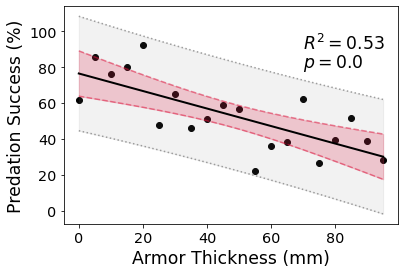

In [5]:
#Format ticks

#Get all the x-axis and y-axis ticklabels into lists
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()

#Combine the lists  
all_tick_labels = xticklabels + yticklabels

#Call the set_fontsize method of each tick label
for label in all_tick_labels:
    label.set_fontsize("x-large")

#Save the figure
#bbox_inches = 'tight' helps resize the figure based on contents
#this helps prevent  legends from being cut off if outside the figure
fig.savefig("armor_thickness_vs_predation_success_version4.png",dpi=300,bbox_inches="tight")

#Show the figure
ax.get_figure()


## Add a legend below our chart

You may have noticed that in many of our previous calls to `plot`, we added a `label` keyword argument that said what the plot element represented. We can now take advantage of this to generate a fancy label. 

One trick that we already used up above that may not have been clear is that we only labeled one of the dotted lines marking the 95% confidence intervals. Initially I had labelled both, but doing so ended up generating a legend that was too cluttered. If we know what a dotted red line means, then we can infer that meaning applies to both.

Legend placement is one of those 'finishing touches' where you almost always have to adjust some things manually if you want the figure to look good. Here, the `bbox_to_anchor` parameter says where on the chart the legend should go. It's short for 'bounding box to anchor'. The bounding box coordinates for the legend are set as a proportion of the figure area - so (1.0,1.0) would be upper right. The x-coordinate of 0.5 says the legend should be positioned in the middle of the figure on the x-axis. We use a negative y-coordinate of -0.3  to stick the legend beneath the figure where it won't cover anything up. 

The `loc` parameter controls which part of the legend will be attached to the bbox_to_anchor coordinates. Here I've specified the coordinates that I want the center of the top of the legend to stick to, so I chose 'upper center'.

Finally `frameon` = False stops the legend from drawing an unnecessary box around itself

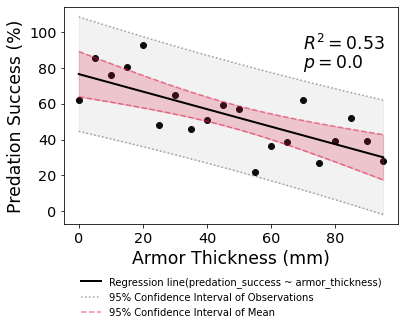

In [6]:
#Set up a legend
ax.legend(loc="upper center",bbox_to_anchor=(0.5,-0.2),frameon=False)

#Save the figure
#bbox_inches = 'tight' helps resize the figure so legends aren't cut off if outside the figure
fig.savefig("armor_thickness_vs_predation_success_version5.png",dpi=300,bbox_inches="tight")

#Show the figure
ax.get_figure()

### Removing unnecessary lines around the plot

In general, it is a good idea to remove graphical elements that do not describe data or add clarity. One example are the lines surrounding our plot. These distract from the data in ways that may not be clear until they are removed.

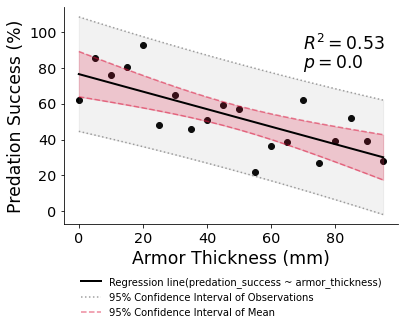

In [7]:
## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

##Save the figure
fig.savefig("armor_thickness_vs_predation_success_version6.png",dpi=300,bbox_inches="tight")

#Get the figure to show the plot
ax.get_figure()

### Set the x- and y-axis limits to match the data

A percentage of successfull predation can't logically fall outside 0% or 100%, so it may be confusing to some viewers to include values outside this range. We can manually set the axis limits to values that make sense for our data using the `ax.set_xlim` or `ax.set_ylim` methods.

In this case the default values for the x-axis seem OK, so we'll just set the y-axis limits.

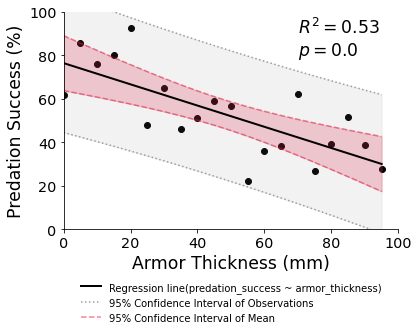

In [8]:
#Format Axes
ax.set_ylim(0,100)
ax.set_xlim(0,100)

#Save the figure
fig.savefig("armor_thickness_vs_predation_success_version7.png",dpi=300,bbox_inches="tight")

#Show the figure
ax.get_figure()

## Setting range frames to indicate the range of data values.

One trick some figures use to indicate the range in the data using a technique known as a [range frame](https://www.ajnisbet.com/blog/tufte-in-matplotlib). Basically the x- and y-axes are repurposed to also show the range of the data. You can implement range frames in matplotlib by setting the bounds of the bottom and left spines:

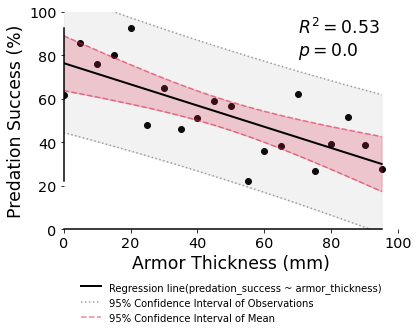

In [9]:
# Set spine extent.
ax.spines['bottom'].set_bounds(min(x_data), max(x_data))
ax.spines['left'].set_bounds(min(y_data),max(y_data))

#Make the spine a little thicker
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

#Save the figure
fig.savefig("armor_thickness_vs_predation_success_version8.png",dpi=300,bbox_inches="tight")

#Show the figure
ax.get_figure()

## Whew! That's It

As you can see, getting a 'pretty good' figure is relatively quick, but there are a lot of extra steps you can choose to take if you want the figure to look as nice as possible. Of course, it's not worth it to polish every figure to this degree, especially for the steps — like setting axis limits and placing annotations of statistical values — that require a bit of manual adjustment. Hopefully these examples are useful, however, in giving a toolbox of ideas you can use to mark up your own figures.  

**The final code**: If you'd like to see code for the final figure, it is available in a single cell in the appendix at the bottom of the notebook.



## Exercises

**Exercise 1.** Describe the difference between the 95% confidence interval (that is the confidence interval of the mean), versus the 95% prediction interval (the confidence interval of the predicted y values). 
    
**Exercise 2.** In the code cell below, I have entered the code used to generate the simulated data above. Try generating your own dataset using the code, *but keep the slope, standard deviation of the error, and intercept the same* (-35.0,70.0 and 18.0, respectively). In a momement we will load this new dataset and analyze it. Before you analyze the data, write down an answer to the following questions:
    "Do you think you will infer the same slope and intercept as in the example dataset up above?"

In [10]:
import numpy as np
def linear_simulation(x_data,slope,error_stdev = 20, intercept = 0):
    """Return y data given x data and parameters
    x_data -- a list of x data points (ints or floats)
    slope -- the slope of our linear model (m in y=mx+b+error)
    error_stdev -- the standard deviation of normal error
    intercept -- the intercept of our linear model (b in y=mx+b+error)
    """
    y_predictions = []
    for i,x in enumerate(x_data):
        error = np.random.normal(loc=0.0,scale = error_stdev,size = None)
        y = slope*x + error + intercept 
        y_predictions.append(y)
        
    return y_predictions

x_data = list(range(0,100,5))    
y_data = linear_simulation(x_data = x_data,slope = -0.35,intercept =70.0,error_stdev=18.0)
df = pd.DataFrame()
df["armor_thickness"] = x_data
df["predation_success"] = y_data
df.to_csv('armor_thickness_vs_predation_for_exercise.csv')

**Exercise 3** Now run the linear_simulation function to generate a new dataset as shown in the code below. Next, perform linear regression of armor thickness against predation success on this new dataset, and record the slope you get. Did the result match your prediction? Did you get the same value as before? If you like, you can repeat this more than once. Do you always get the same inferred slope, or is it different each time?

**Exercise 4** Research the notion of a 95% confidence interval for the mean. If you repeated this analysis 100 times, how often do you expect the inferred prediction line to fall within the 95% confidence interval for the mean in the initial analysis?

## References and Further Reading
- [Tufte in Matplotlib](https://www.ajnisbet.com/blog/tufte-in-matplotlib)
   Outstanding guide to adding minimalist Tufte-style modifications to matplotlib plots.
   
- [Making Plots in Jupyter Notebook Beautiful and More Meaningful](https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d)
   A useful tutorial on formatting matplotlib plots, including gridlines and axes
   
- [StackExchange: how to set font sizes in matplotlib](https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)
  Has a useful example of using rcParams to set all fontsizes in matplotlib in a consistent way


## Reading Responses and Feedback

## Appendix - Code for the Final Figure

<Figure size 432x288 with 0 Axes>

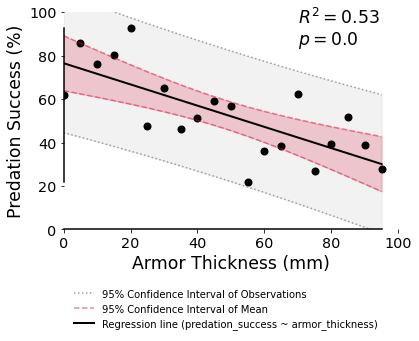

In [11]:

#Generate a scatterplot with simple linear regression in matplotlib

#Import pandas, statsmodels' formula api and matplotlib
#Give each a short alias - pd, smf or plt respectively
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#Load the data into a pandas DataFrame
df = pd.read_csv('./resources/armor_thickness_vs_predation.csv')

#Extract x and y data into lists
x_data = list(df['armor_thickness'])
y_data = list(df['predation_success'])

#Clear the current figure to start fresh
plt.clf()

# Fit a regression line to the data
formula = "predation_success ~ armor_thickness"
model = smf.ols(formula,data=df)
model_fit = model.fit()
prediction = model_fit.get_prediction()
model_prediction_df = prediction.summary_frame()

#Get predicted values from the model
y_predicted = model_fit.fittedvalues

#Set up subplots
fig,ax = plt.subplots()

#We want scatterplot points and the thick line
#to plot on top of our shaded 95% confidence interval,
#so we plot the confidence interval first

#Plot a shaded area for the 95% prediction interval
#95% of future observed y values for a given x value should fall within this range
#Shade in the outermost confidence interval first, as it will be on bottom
lower_obs_ci = model_prediction_df["obs_ci_lower"]
upper_obs_ci = model_prediction_df["obs_ci_upper"]
ax.fill_between(x_data,lower_obs_ci,upper_obs_ci,alpha=0.1,color='grey')

#Add dotted lines to the edges of the 95% prediction interval
ax.plot(x_data,lower_obs_ci,alpha=0.75,marker=None,linestyle='dotted',color='grey',label="95% Confidence Interval of Observations")
ax.plot(x_data,upper_obs_ci,alpha=0.75,marker=None,linestyle='dotted', color='grey')

#Plot a shaded area for the 95% confidence interval of the regression
#the true regression line (if the model is correct) should fall within this area 95% of the time
lower_ci = model_prediction_df["mean_ci_lower"]
upper_ci = model_prediction_df["mean_ci_upper"]
ax.fill_between(x_data,lower_ci,upper_ci,alpha=0.2,color='crimson')

#Add dashed lines to the edges of the 95% confidence interval
ax.plot(x_data,lower_ci,alpha=0.5,marker=None,linestyle='dashed',color='crimson',label="95% Confidence Interval of Mean")
ax.plot(x_data,upper_ci,alpha=0.5,marker=None,linestyle='dashed',color='crimson')



#Plot the model fit line using a thick black line
ax.plot(x_data,y_predicted,label=f"Regression line ({formula})",color="black",linewidth=2)

#Plot the data points in black
ax.scatter(x_data,y_data,marker='o',color='black',edgecolor='black',linewidth=2)

#Set labels
ax.set_xlabel("Armor Thickness (mm)",size="xx-large")
ax.set_ylabel("Predation Success (%)",size="xx-large")

#Extract R2 from model and add to scatterplot
R2 = round(model_fit.rsquared,2)
ax.annotate(xy=(70,95),text=fr'$R^2 = {R2}$',size="xx-large")

#Extract p from the model and add to scatterplot
p = round(model_fit.f_pvalue,2)
ax.annotate(xy=(70,85),text=fr'$p = {p}$',size="xx-large")

## Make the tick labels larger

#Get all the x-axis and y-axis ticklabels into lists
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()

#Combine the lists  
all_tick_labels = xticklabels + yticklabels

#Call the set_fontsize method of each tick label
for label in all_tick_labels:
    label.set_fontsize("x-large")

#Set up a legend
fig.legend(loc="upper center",bbox_to_anchor=(0.5,-0.05),frameon=False)

#Manually set Axis Limits
ax.set_ylim(0,100)
ax.set_xlim(0,100)

## Remove unnecessary axis lines (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make a range frame (by setting spine extent of remaining axis lines)
ax.spines['bottom'].set_bounds(min(x_data), max(x_data))
ax.spines['left'].set_bounds(min(y_data),max(y_data))

#Make the range frame axis lines a little thicker
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

#Save the figure
#dpi controls resolution in dots per square inch
#bbox_inches = 'tight' helps resize the figure so legends aren't cut off if outside the figure
plt.savefig("armor_thickness_vs_predation_success_final.png",dpi=300,bbox_inches="tight")